# Dataset Info:
- **Variables:**

    1. Ship Mode: Mode of shipping used for shipment delivery
    2. Segment: (Categorical) Customer segment product was shipped to
    3. Country: Country in which the shipment was delivered
    4. City: City in which shipment was delivered
    5. State: State in which the shipment was delivered
    6. Postal code: Postal code the shipment was delivered to
    7. Region: Country region
    8. Category: The category product belongs to
    9. Sub-category: Sub-category of the product
    10. Sales: Sale made in USD
    11. Quantity: Product quantity
    12. Discount: Discount given on the product
    13. Profit: Profit/loss made on the sale

# Import Libraries & Load dataset:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('SampleSuperstore.csv')

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Missing data:

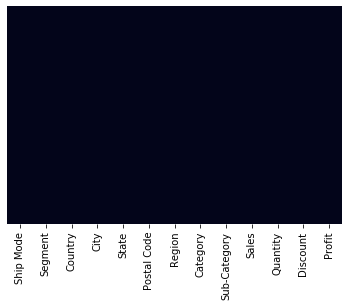

In [6]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False)

#### Observation:
There is no missing values in any of the variable of the data.

# Outlier detection:

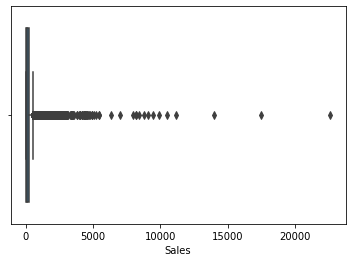

In [7]:
sns.boxplot('Sales', data = data)

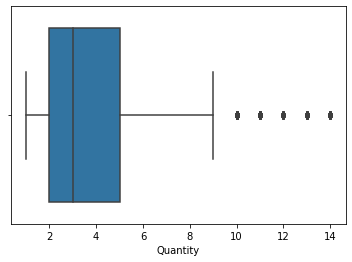

In [8]:
sns.boxplot('Quantity', data = data)

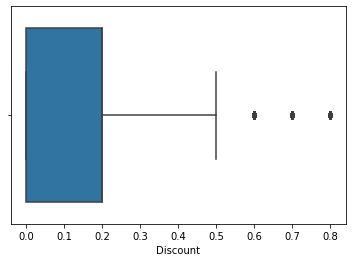

In [9]:
sns.boxplot('Discount', data = data)

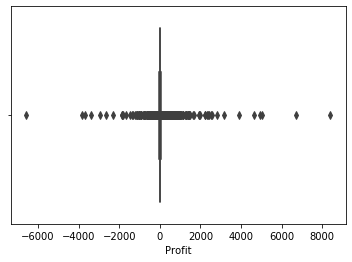

In [10]:
sns.boxplot('Profit', data = data)

## Distribution of Continous variables:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A1322E3CC8>,
      dtype=object)

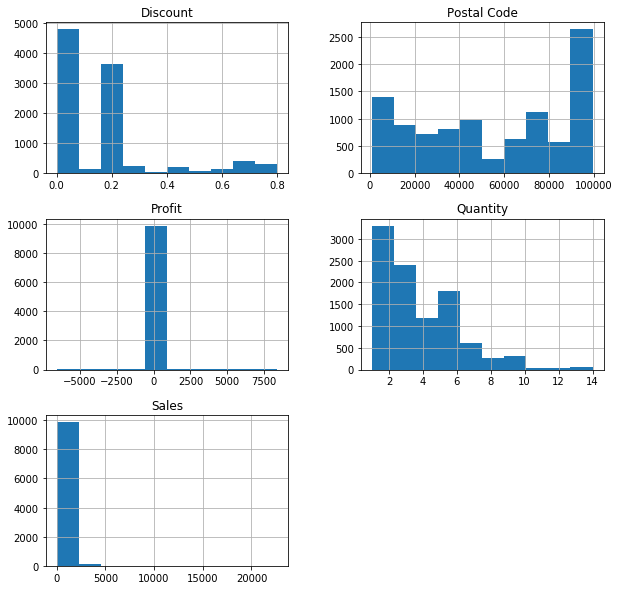

In [11]:
numeric = data.select_dtypes(include = ['float64', 'int64'])
numeric.hist(figsize= (10, 10))

# Pie Chart:

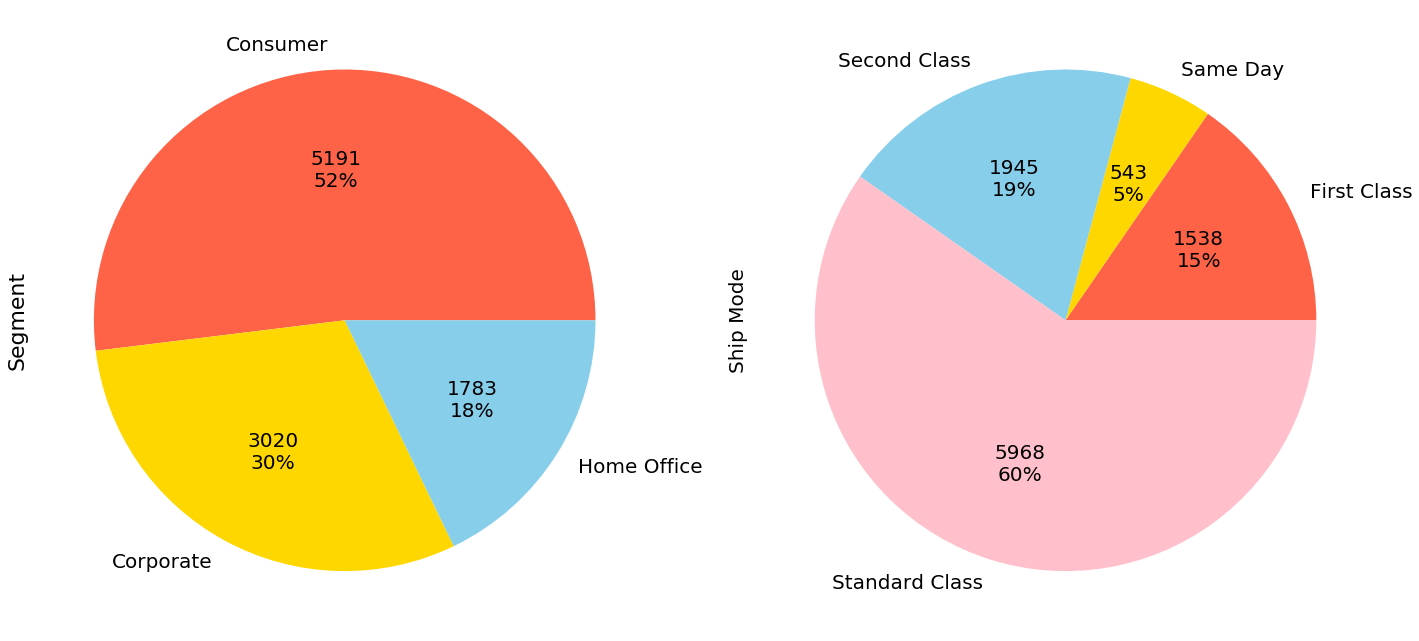

In [12]:
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 20))

data.groupby('Segment').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                  colors=['tomato', 'gold', 'skyblue'], ax=ax1)

data.groupby('Ship Mode').size().plot(kind='pie', textprops={'fontsize': 20}, autopct=label_function,
                                  colors=['tomato', 'gold', 'skyblue', 'pink'], ax=ax2)

ax1.set_ylabel('Segment', size=22)
ax2.set_ylabel('Ship Mode', size = 20)
plt.tight_layout()
plt.show()

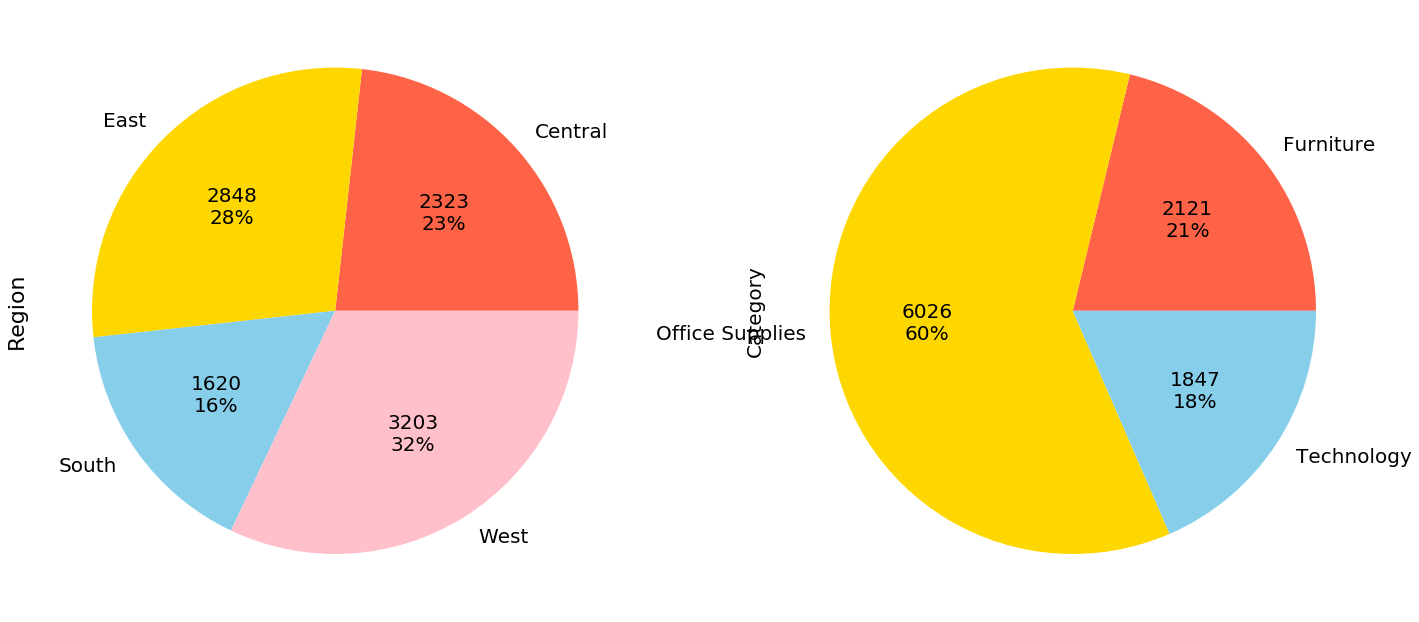

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 20))

data.groupby('Region').size().plot(kind='pie', textprops={'fontsize': 20}, autopct=label_function,
                                  colors=['tomato', 'gold', 'skyblue', 'pink'], ax=ax1)

data.groupby('Category').size().plot(kind='pie', textprops={'fontsize': 20}, autopct=label_function,
                                  colors=['tomato', 'gold', 'skyblue', 'pink'], ax=ax2)

ax1.set_ylabel('Region', size=22)
ax2.set_ylabel('Category', size = 20)
plt.tight_layout()
plt.show()

# Bar Plots:

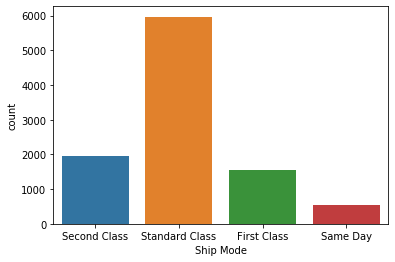

In [14]:
sns.countplot(x = 'Ship Mode', data = data)

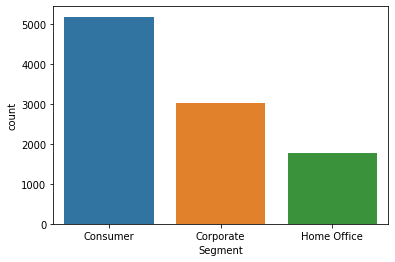

In [15]:
sns.countplot(x = 'Segment', data = data)

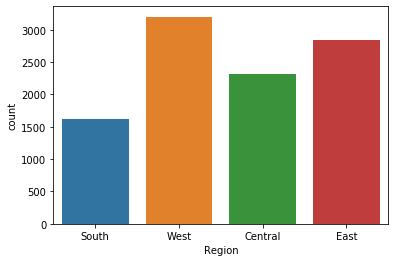

In [16]:
sns.countplot(x = 'Region', data = data)

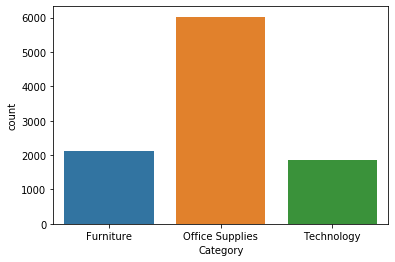

In [17]:
sns.countplot(x = 'Category', data = data)

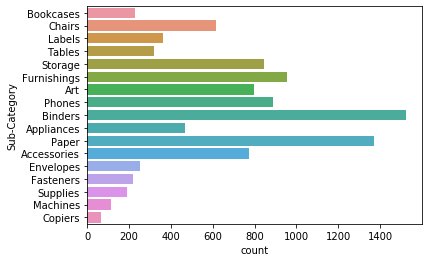

In [18]:
sns.countplot(y = 'Sub-Category', data = data)

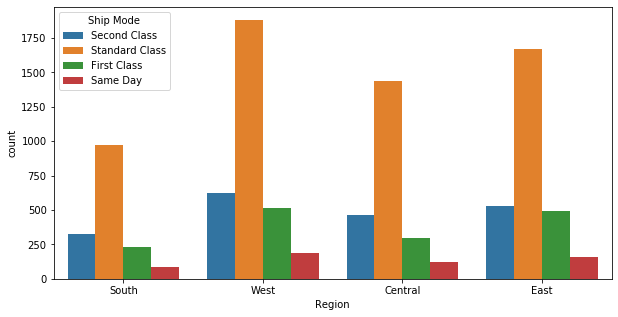

In [19]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Region', hue = 'Ship Mode', data = data)

### > Ship mode and Profit: (Segment wise)

Text(0.5, 1.0, 'Ship Mode wise Profit through Segment')

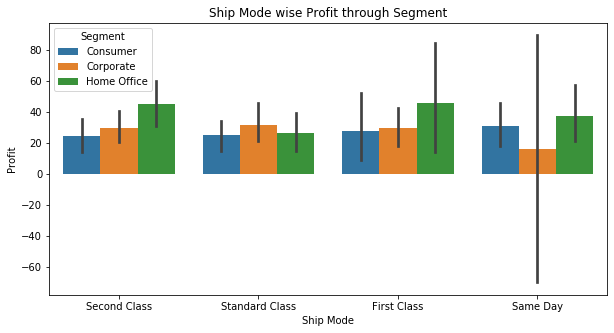

In [20]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Ship Mode', y = 'Profit', hue = 'Segment', data = data)
plt.title('Ship Mode wise Profit through Segment')

#### Observation:
profit are lowest on same day shipping mode for corporate segment.

### Ship mode and Sales: (Segment wise)

Text(0.5, 1.0, 'Ship Mode wise sales through Segment')

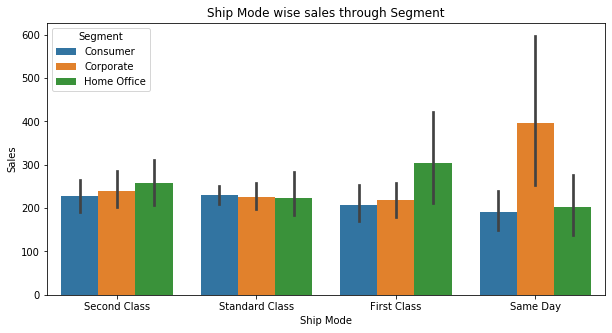

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Ship Mode', y = "Sales", hue = 'Segment', data = data)
plt.title('Ship Mode wise sales through Segment')

#### Observation:
Sales are highgest on same day shipping mode for corporate segment. 

### Ship mode and Profit: (Region wise)

Text(0.5, 1.0, 'Ship Mode wise profit through Regions')

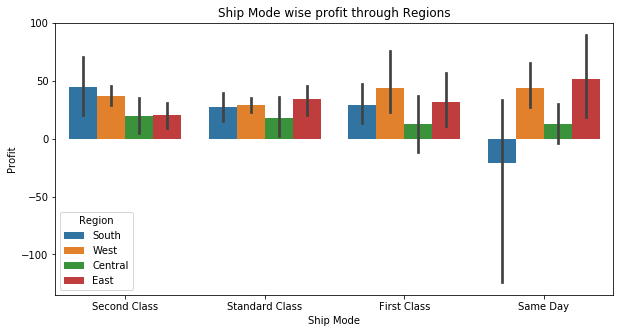

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Ship Mode', y = "Profit", hue = 'Region', data = data)
plt.title('Ship Mode wise profit through Regions')

#### Observation:
Profits are lowest on same day shipping mode in South region.

### Ship mode and Sales: (Region wise)

Text(0.5, 1.0, 'Ship Mode wise Sales through Regions')

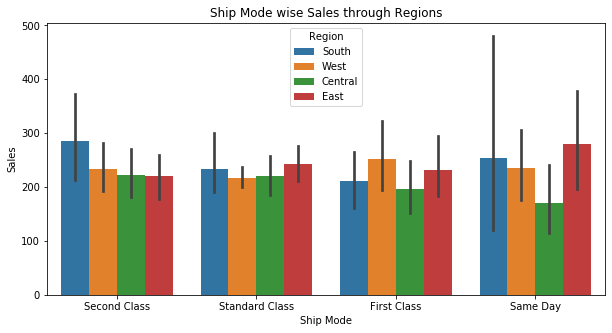

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Ship Mode', y = "Sales", hue = 'Region', data = data)
plt.title('Ship Mode wise Sales through Regions')

#### Observation:
Sales are almost same for any shipping mode in every region.

### Ship mode and Profit: (Category wise)

Text(0.5, 1.0, 'Ship Mode wise profit through Category')

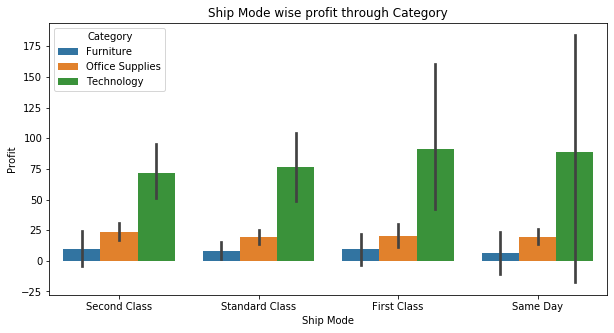

In [24]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Ship Mode', y = "Profit", hue = 'Category', data = data)
plt.title('Ship Mode wise profit through Category')

#### Observation:
profit by furniture is lowest in every shipping mode.

### Ship mode and Sales: (Category wise)

Text(0.5, 1.0, 'Ship Mode wise sales through Category')

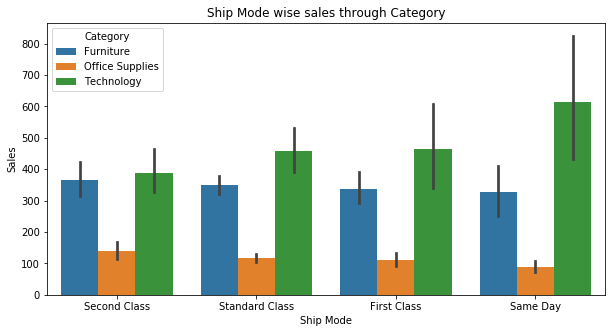

In [25]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Ship Mode', y = "Sales", hue = 'Category', data = data)
plt.title('Ship Mode wise sales through Category')

#### Observation:
Sales by office supplies is lowest in every shipping mode.

### Segment and profit: (Region wise)

Text(0.5, 1.0, 'Segment wise Profit through Regions')

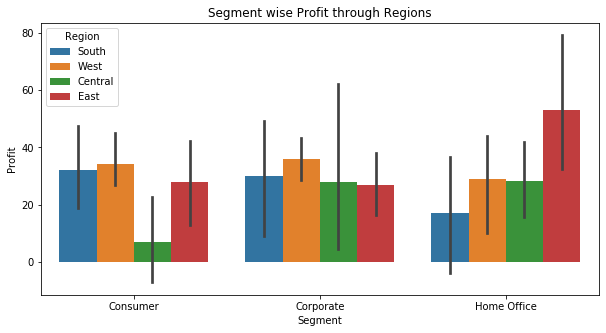

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Segment', y = "Profit", hue = 'Region', data = data)
plt.title('Segment wise Profit through Regions')

#### Observation:
Profits are lower in central Regions.

### Segment and sales: (Region wise)

Text(0.5, 1.0, 'Segment wise Sales through Regions')

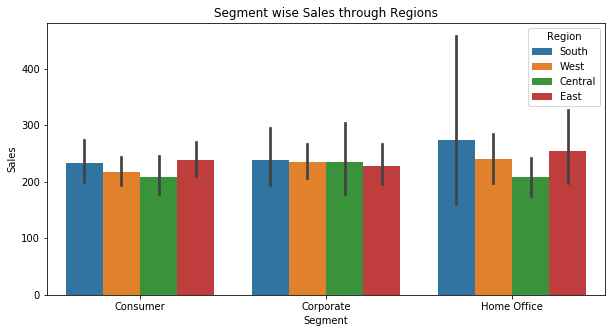

In [27]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Segment', y = "Sales", hue = 'Region', data = data)
plt.title('Segment wise Sales through Regions')

#### Observation:
Sales are almost same for any shipping mode in every segment.

### Segment and profit: (Category wise)

Text(0.5, 1.0, 'Segment wise Sales through Category')

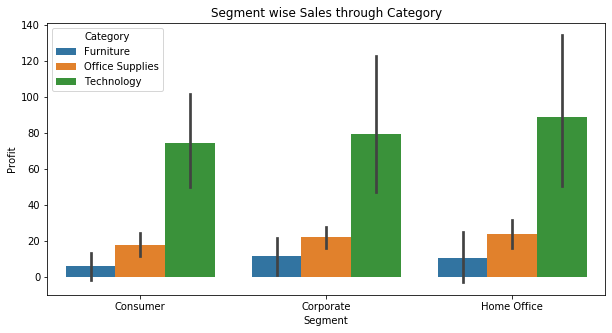

In [28]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Segment', y = "Profit", hue = 'Category', data = data)
plt.title('Segment wise Sales through Category')

#### Observation:
profit by furniture is lowest in every segment.

### Segment and sales: (Category wise)

Text(0.5, 1.0, 'Segment wise Sales through Category')

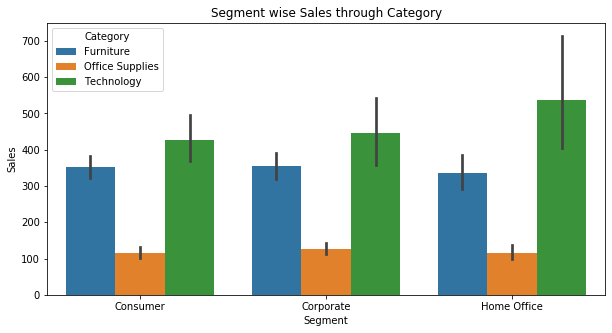

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Segment', y = "Sales", hue = 'Category', data = data)
plt.title('Segment wise Sales through Category')

#### Observation:
Sales by office supplies is lowest in every segment.

### Region and profit: (Category wise)

Text(0.5, 1.0, 'Region wise Profit through Category')

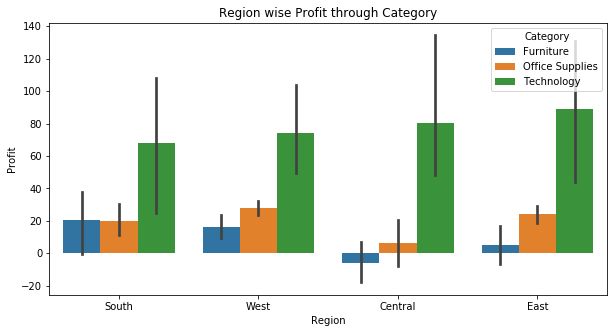

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Region', y = "Profit", hue = 'Category', data = data)
plt.title('Region wise Profit through Category')

#### Observation:
profit by furniture is lowest in every category.

### Region and sales: (Category wise)

Text(0.5, 1.0, 'Region wise Sales through Category')

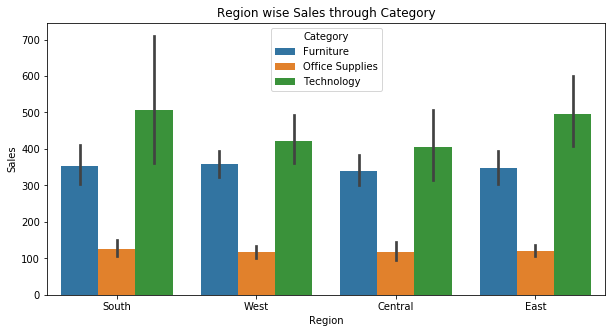

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(x = 'Region', y = "Sales", hue = 'Category', data = data)
plt.title('Region wise Sales through Category')

#### Observation:
Sales by office supplies is lowest in every category.

## Correlation plot:

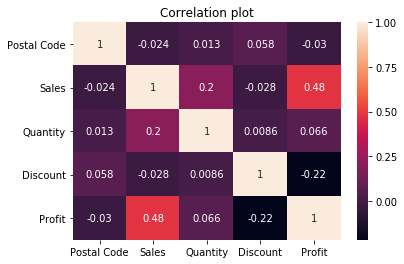

In [32]:
correlation = data.corr()
sns.heatmap(correlation, annot = True)
plt.title("Correlation plot")

b, t = plt.ylim() 
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Observation:
we can see that, there is negative correlation between Discount and Profit. i.e we can say that as dicount increases companies profit are decreses.

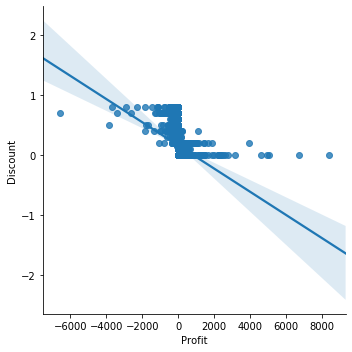

In [35]:
sns.lmplot(x = "Profit", y = "Discount", data = data)

#### Observation:
Also from the above graph we can see that as a discount increases profit decreases.

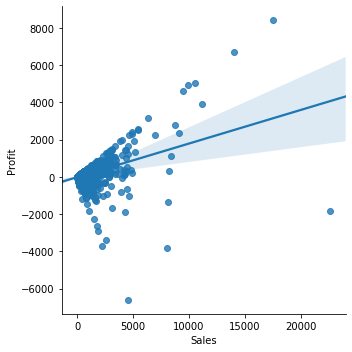

In [34]:
sns.lmplot(x = 'Sales', y = 'Profit', data = data)